## LIGN 167: Problem Set 1
### Name: Chih-Hsuan Kao
### Date: October 5, 2018

Problem 1

In [1]:
#given two numpy array return estimated value of the slope
import numpy as np
def compute_slope_estimator(x, y):
    sumX=sumY=sumXY=sumXsquare=0;
    for i in range(len(x)):
        sumXY = sumXY + x[i] * y[i]
        sumXsquare = sumXsquare + x[i]*x[i]
    slope = (sumXY - len(x)*np.average(x)*np.average(y))/(sumXsquare - len(x)*np.average(x)*np.average(x))
    return slope

Problem 2

In [2]:
#given two numpy array x,y return the value of intercept b
def compute_intercept_estimator(x,y):
    return (np.average(y) - compute_slope_estimator(x,y) * np.average(x) )

Problem 3

In [4]:
#given two array return the tuple of values
def train_model(x,training_set):
    return(compute_slope_estimator(x,training_set) , compute_intercept_estimator(x,training_set))

Problem 4

In [5]:
#given four paramter return numpy array y
#x_vals=[1,2,3,4]
#a=1
#b=1
#sd=1
##########################################
def sample_linear_model(x,slope,intercept,sd):
    y = np.zeros(shape=(len(x),1))
    epsilon = np.random.normal(0, sd, len(x))
    for i in range(len(x)):
        y[i] = slope*x[i]+intercept+epsilon[i]
    return y

#g=sample_linear_model(x_vals,a,b,sd)

Problem 5

In [6]:
#return a list of dataset

#x=[1,2,3,4]
#slope=1
#intercept=1
#sd=1
#n=2

def sample_datasets(x,slope,intercept,sd,n):
    t = []
    for i in range(n):
        t.append(sample_linear_model(x,slope,intercept,sd))
    return t

#g=sample_datasets(x,slope,intercept,sd,n)
#g

Problem 6

In [7]:
def compute_average_estimated_slope(x_vals,a=1,b=1,sd=1):
    n = 1000
    trainingSet = sample_datasets(x_vals,a,b,sd,n)
    sumSlope=0
    for i in range(n):
        sumSlope = sumSlope + compute_slope_estimator(x_vals, trainingSet[i])
    return sumSlope/1000

Problem 7 <br>
Free response answer:
As n increase the average estimated slope become more accurate.
Initially, n=5 the slope was 0.998208.
Then, n=10, the slope was 0.98593583.
Finally, n=1000, the slope was 1.00140381, which was close to 1.

In [9]:
#print out the different value of x_vals

#test code is commented out below

x_vals = np.linspace(0,1,5)
a= compute_average_estimated_slope(x_vals)
#print("n=5: ",a)
x_vals = np.linspace(0,1,100)
a= compute_average_estimated_slope(x_vals)
#print("n=100: ",a)
x_vals = np.linspace(0,1,1000)
a= compute_average_estimated_slope(x_vals)
#print("n=1000: ",a)

Problem 8 <br>
Free response answer: As n increase the estimated error decrease. Initially, n=5 the error was 1.602. Then, n=10, the error was 0.11709. Finally, n=1000, the error was 0.01118

In [10]:
#Problem 8 retrun the average square error of the estimated slope
def compute_estimated_slope_error(x_vals,a=1,b=1,sd=1):
    n = 1000
    trainingSet = sample_datasets(x_vals,a,b,sd,n)
    sumSlope=0
    for i in range(n):
        sumSlope = sumSlope + (1 - (compute_slope_estimator(x_vals, trainingSet[i])))*(1 - (compute_slope_estimator(x_vals, trainingSet[i])))
    return sumSlope/1000

x_vals = np.linspace(0,1,5)
a= compute_estimated_slope_error(x_vals)
#print("n=5: ",a)
x_vals = np.linspace(0,1,100)
a= compute_estimated_slope_error(x_vals)
#print("n=100: ",a)
x_vals = np.linspace(0,1,1000)
a= compute_estimated_slope_error(x_vals)
#print("n=1000: ",a)

Problem 9: <br>
Free response answer: As n increase the histagram plot become more concetrate to the mean 1.My plot use the automatic bin option. Therefore, the plotslooks like the same, but the x axis is different.

In [11]:
#n=5 problem9

import matplotlib.pyplot as plt
x_vals = np.linspace(0,1,5)
a= compute_estimated_slope_error(x_vals)
a = 1
b = 1    
sd = 1
n = 1000
trainingSet = sample_datasets(x_vals,a,b,sd,n)
x=np.zeros(shape=(1000,1))
for i in range(n):
    x[i] = (compute_slope_estimator(x_vals, trainingSet[i]))
n,bins,patches = plt.hist(x,bins='auto',facecolor='blue',alpha=0.5)
plt.show()

<Figure size 640x480 with 1 Axes>

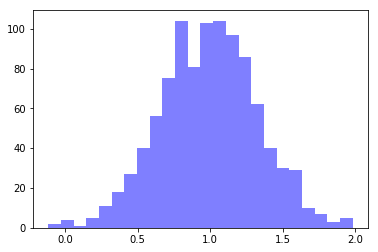

In [12]:
#n=100 problem9
x_vals = np.linspace(0,1,100)
a= compute_estimated_slope_error(x_vals)
a = 1
b = 1    
sd = 1
n = 1000
trainingSet = sample_datasets(x_vals,a,b,sd,n)
x=np.zeros(shape=(1000,1))
for i in range(n):
    x[i] = (compute_slope_estimator(x_vals, trainingSet[i]))
n,bins,patches = plt.hist(x,bins='auto',facecolor='blue',alpha=0.5)
plt.show() 

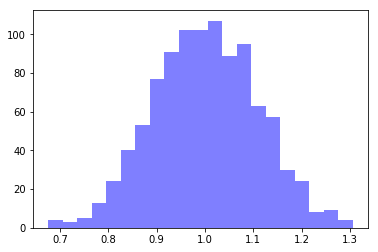

In [13]:
#n=1000 problem9
x_vals = np.linspace(0,1,1000)
a= compute_estimated_slope_error(x_vals)
a = 1
b = 1    
sd = 1
n = 1000
trainingSet = sample_datasets(x_vals,a,b,sd,n)
x=np.zeros(shape=(1000,1))
for i in range(n):
    x[i] = (compute_slope_estimator(x_vals, trainingSet[i]))
n,bins,patches = plt.hist(x,bins='auto',facecolor='blue',alpha=0.5)
plt.show() 

Problem 10 <br>
return the average square different btw arrays

In [14]:
# return the average square different btw arrays
#y=[1,1,1,1]
#y_hat=[4,4,4,4]

def calculate_prediction_error(y, y_hat):
    sumError=0
    for i in range(len(y)):
        sumError = sumError + (y[i]-y_hat[i])*(y[i]-y_hat[i])
    return sumError / len(y)

#b=calculate_prediction_error(y, y_hat)
#b

Problem 11 <br>
Free response answer: As n increase the average_training_set_error increase and become more close to the vlaue 1. I suppose the reason is that we are testing the set with our training set. Since we have train our slope and intercept based on the training set already, the slope and intercept wereto desgined to be fit our data. That is the reason why all error over here was less than 1. And also the more data we consider would slightly increase the error but the sum will be less than one.

Initially, n=5 the slope was 0.60149. Then, n=10, the slope was 0.97660019. Finally, n=1000, the slope was 0.992678, which was closer to 1.

In [15]:
def average_training_set_error(x_vals,a=1,b=1,sd=1):
    n = 1000
    #define vector
    slope_estimator= intercept_estimator=y_hat = predict_error =0
    #set up 1000 training set
    trainingSet = sample_datasets(x_vals,a,b,sd,n)
    for i in range(n):
        #Calculate the estimator of the slope and the intercept
        slope_estimator = compute_slope_estimator(x_vals, trainingSet[i])
        intercept_estimator= compute_intercept_estimator(x_vals, trainingSet[i])         
        #use the estimated slope and intercept to compute predicted value y_hat
        y_hat = slope_estimator * x_vals + intercept_estimator
        
        #use the cuntion to compute the predicted value y_hat and the store it in a numpy array
        predict_error = predict_error+ calculate_prediction_error(trainingSet[i], y_hat)
    return predict_error / n

x_vals = np.linspace(0,1,5)
a= average_training_set_error(x_vals)
print("n=5: ",a)
x_vals = np.linspace(0,1,100)
a= average_training_set_error(x_vals)
print("n=100: ",a)
x_vals = np.linspace(0,1,1000)
a= average_training_set_error(x_vals)
print("n=1000: ",a)


n=5:  [0.60443282]
n=100:  [0.98186765]
n=1000:  [0.99975183]


Problem 12 <br>
Free response answer: As n increase the average_training_set_error decrease and become more close to the vlaue 1. This is much more intuitively correct. The more the data, the less the error.
 
Initially, n=5 the set error was 1.303. Then, n=10, the set error was 1.022. Finally, n=1000, the set error was 1.008, which was closer to 1.


In [16]:

def average_test_set_error(x_vals,a=1,b=1,sd=1):
    n = 1000
    #define vector
    predict_error = 0
    slope_estimator= intercept_estimator=y_hat = predict_error =0
    #set up 1000 training set
    trainingSet = sample_datasets(x_vals,a,b,sd,n)
    for i in range(n):
        #Calculate the estimator of the slope and the intercept
        slope_estimator = compute_slope_estimator(x_vals, trainingSet[i])
        intercept_estimator= compute_intercept_estimator(x_vals, trainingSet[i])         
        #use the estimated slope and intercept to compute predicted value y_hat
        y_hat = slope_estimator * x_vals + intercept_estimator
        
        #use the cuntion to compute the predicted value y_hat and the store it in a numpy array
        predict_error = predict_error+ calculate_prediction_error(sample_linear_model(x_vals,a,b,sd), y_hat)
    return predict_error / n

x_vals = np.linspace(0,1,num=5)
a= average_test_set_error(x_vals)
print("n=5: ",a)
x_vals = np.linspace(0,1,num=100)
a= average_test_set_error(x_vals)
print("n=100: ",a)
x_vals = np.linspace(0,1,num=1000)
a= average_test_set_error(x_vals)
print("n=1000: ",a)


n=5:  [1.33229339]
n=100:  [1.02157762]
n=1000:  [1.00287442]
